# Bài toán
> **Phân loại văn bản sử dụng Naive Bayes**

**Mục tiêu:**

- Xây dựng được mô hình Naive Bayes sử dụng thư viện sklearn.
- Ứng dụng và hiểu cách áp dụng mô hình Naive Bayes vào giải quyết bài toán thực tế (ví dụ: phân loại văn bản).
- Sử dụng độ đo Accuracy để đánh giá chất lượng mô hình.

**Vấn đề:**

- Có một tập các văn bản dạng text không có nhãn, làm sao để biết văn bản này thuộc về thể loại nào, pháp luật, đời sống, văn học, thể thao,...

**Dữ liệu:**

- Tập các văn bản và nhãn tương ứng của từng văn bản trong một khoảng thời gian.
- Tập các nhãn - 10 nhãn văn bản:
    > Giải trí, Khoa học - Công nghệ, Kinh tế, Pháp luật, Sức khỏe, Thể thao, Thời sự, Tin khác, Độc giả, Đời sống - Xã hội.
    
**Ví dụ văn bản nhãn thể thao:**

> "Dân_trí Real Madrid đã dẫn trước trong cả trận đấu, nhưng họ vẫn phải chấp_nhận bị Dortmund cầm hòa 2-2 ở Bernabeu. Real Madrid chấp_nhận đứng thứ_hai ở bảng F Champions League..."

**Bài toán: Phân loại**

- Input: n vector mã hóa của các văn bản - ma trận $X = [x_1, x_2, ... x_n]$.
- Output: nhãn $y$ là 1 trong 10 nhãn trên.


# Import các thư viện cần thiết, cài thêm một số thư viện chưa sẵn có

In [1]:
# Cài đặt thư viện xử lý ngôn ngữ cho tiếng Việt!
!pip install pyvi

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

# from sklearn.datasets import load_files
from pyvi import ViTokenizer  # Tách từ tiếng Việt

import sklearn.naive_bayes as naive_bayes
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

%matplotlib inline

# Load dữ liệu từ thư mục đã crawl từ trước

Cấu trúc thư mục như sau:
- `data/news_1135/`
    - `Kinh tế/`
        - `bài báo 1.txt`
        - `bài báo 2.txt`
    - `Pháp luật/`
        - `bài báo 3.txt`
        - `bài báo 4.txt`

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/Code-VinBigData/NaiveBayes-Practice

/content/drive/MyDrive/Code-VinBigData/NaiveBayes-Practice


In [5]:
data_train = load_files(container_path="data/news_1135/", encoding="utf-8")
print("10 files đầu:")
print("\n".join(data_train.filenames[:10]))
print("\n")
print("Tổng số files: {}".format(len(data_train.filenames)))
print("Danh sách nhãn và id tương ứng: ", [(idx, name) for idx, name in enumerate(data_train.target_names)])

10 files đầu:
data/news_1135/Thể thao/16f102915e67794763026b09ec525436484689eb.txt
data/news_1135/Kinh tế/433f99335f3e6b58c7521064a09babcc9a357482.txt
data/news_1135/Pháp luật/9f5b785a7a0dce340c5e7f036111eea1cc27a433.txt
data/news_1135/Giải trí/6104252423e26b52f1721f5e0eed60219c2513ff.txt
data/news_1135/Khoa học - Công nghệ/d282c5c67b5d1043116fc67e27f0df2f00863601.txt
data/news_1135/Kinh tế/7c30914c77f09061a6d11860c50a53a44a262431.txt
data/news_1135/Kinh tế/8e29c03340fb0cdc77f71aa970fe401e844ebb8b.txt
data/news_1135/Khoa học - Công nghệ/ba96cc82b8653a4cdbec5bf6a708e959e005fc2c.txt
data/news_1135/Giải trí/56cf9629919b76cbfd45184c37a65e9e74c6e7d0.txt
data/news_1135/Kinh tế/5ceb6b5e3c04aa06fd6a268cdff2ededb3a47af6.txt


Tổng số files: 762
Danh sách nhãn và id tương ứng:  [(0, 'Giải trí'), (1, 'Khoa học - Công nghệ'), (2, 'Kinh tế'), (3, 'Pháp luật'), (4, 'Sức khỏe'), (5, 'Thể thao'), (6, 'Thời sự')]


In [6]:
### bài tập ###
# yêu cầu: hiển thị nội dung, và nhãn của văn bản đầu tiên trong tập train
# gợi ý: tự làm
###############
# code

print("- Nội dung của văn bản đầu tiên:", data_train.data[0])
print("- Nhãn của văn bản đầu tiên:", end=" ")
print(data_train.target_names[0])

###############

- Nội dung của văn bản đầu tiên: Dân_trí Đêm qua , Bayern Munich đã quật_ngã Atletico Madrid trong trận đấu cuối_cùng vòng bảng với tỷ_số 1-0 . Người ghi_bàn duy_nhất ở trận đấu này là tiền_đạo Lewandowski . Trong những năm qua , Atletico Madrid tựa như nỗi ác_mộng với Bayern Munich khi vượt_qua CLB này ở bán_kết Champions League mùa 2015 / 16 và trận lượt đi_vòng bảng mùa này . Chính vì_vậy , dù không còn mục_tiêu nhưng “ Hùm xám ” vẫn quyết_định phục hận đối_thủ tới từ Tây Ban Nha trong trận đấu cuối_cùng vòng bảng . Cuối_cùng , thày trò HLV Ancelotti đã hoàn_thành nhiệm_vụ ấy . Sau 90 phút ở Allianz Arena , Bayern Munich đã giành chiến_thắng với tỷ_số 1-0 trước Atletico Madrid với bàn thắng duy_nhất của Lewandowski . Kết_quả này không thay_đổi cục_diện bảng D. Atletico Madrid dẫn đầu_bảng với 15 điểm , đứng tiếp_sau là Bayern Munich với 12 điểm . Rostov đã về đích ở vị_trí thứ 3 ( và giành vé xuống chơi ở Europa League ) với 5 điểm và xếp cuối_cùng PSV khi chỉ giành được 2 điểm . Tr

#  Tiền xử lý dữ liệu đưa dữ liệu từ dạng text về dạng ma trận

- Thử nghiệm để kiểm tra hoạt động chuyển hoá dữ liệu về dạng ma trận

In [7]:
# Load dữ liệu các stopwords
with open("data/vietnamese-stopwords.txt", encoding="utf8") as f:
    stopwords = f.readlines()
stopwords = [x.strip().replace(" ", "_") for x in stopwords]
print("Danh sách 10 từ dừng đầu tiên (từ không mang ý nghĩa phân loại): ", stopwords[:10])
print()

# Transforming data
# Chuyển hoá dữ liệu text về dạng vector TF-IDF
#   - loại bỏ từ dừng
#   - sinh từ điển
module_count_vector = CountVectorizer(stop_words=stopwords)
model_rf_preprocess = Pipeline(
    [
        ("vect", module_count_vector),
        ("tfidf", TfidfTransformer()),
    ]
)

# Hàm thực hiện chuyển đổi dữ liệu text thành dữ liệu số dạng ma trận
# Input: Dữ liệu 2 chiều dạng numpy.array, mảng nhãn id dạng numpy.array

# Tiền xử lý với Bag of words
data_bow = module_count_vector.fit_transform(data_train.data, data_train.target)

# Tiền xử lý với TF-IDF
data_tfidf = model_rf_preprocess.fit_transform(data_train.data, data_train.target)

print("10 từ đầu tiên trong từ điển:\n")
for i, (k, v) in enumerate(module_count_vector.vocabulary_.items()):
    print(i + 1, ": ", (k, v))
    if i + 1 >= 10:
        break

Danh sách 10 từ dừng đầu tiên (từ không mang ý nghĩa phân loại):  ['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy', 'ai_đó', 'alô', 'amen', 'anh', 'anh_ấy']

10 từ đầu tiên trong từ điển:

1 :  ('dân_trí', 4599)
2 :  ('đêm', 16974)
3 :  ('bayern', 1535)
4 :  ('munich', 8900)
5 :  ('quật_ngã', 11580)
6 :  ('atletico', 1392)
7 :  ('madrid', 8484)
8 :  ('trận', 14456)
9 :  ('đấu', 17230)
10 :  ('vòng', 15732)


# Chia dữ liệu làm 2 phần training và testing

- Training chiếm 80 % dữ liệu
- Testing chiếm 20 % dữ liệu

In [8]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành 2 phần sử dụng hàm train_test_split
test_size = 0.2
# Bow
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(data_bow, data_train.target, test_size=test_size, random_state=30)
# Tf-idf
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(data_tfidf, data_train.target, test_size=test_size, random_state=30)

# Hiển thị một số thông tin về dữ liệu
print("Dữ liệu training (BoW) =", X_train_bow.shape, y_train_bow.shape)
print("Dữ liệu testing (BoW) =", X_test_bow.shape, y_test_bow.shape)

print()

print("Dữ liệu training (TF-IDF) =", X_train_tfidf.shape, y_train_tfidf.shape)
print("Dữ liệu testing (TF-IDF) =", X_test_tfidf.shape, y_test_tfidf.shape)

print()

print("Danh sách nhãn và id tương ứng: ", [(idx, name) for idx, name in enumerate(data_train.target_names)])

Dữ liệu training (BoW) = (609, 17787) (609,)
Dữ liệu testing (BoW) = (153, 17787) (153,)

Dữ liệu training (TF-IDF) = (609, 17787) (609,)
Dữ liệu testing (TF-IDF) = (153, 17787) (153,)

Danh sách nhãn và id tương ứng:  [(0, 'Giải trí'), (1, 'Khoa học - Công nghệ'), (2, 'Kinh tế'), (3, 'Pháp luật'), (4, 'Sức khỏe'), (5, 'Thể thao'), (6, 'Thời sự')]


In [9]:
X_train_bow[1].data

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  1,  1,  1,  2,  5,  3,  1,  1,  1,  2,  1,  2,  1,  1,
        2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  2,  3,  1,  1,  1,  1,
        1,  2,  1,  1,  1,  1,  2,  1,  1,  1,  2,  1,  2,  2, 11,  3,  4,
        8,  3,  2,  2,  2,  3,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,
        1])

In [10]:
### bài tập ###
# yêu cầu: Hiển thị ra id, tên nhãn của 5 văn bản đầu tiên trong tập train.
# gợi ý: lấy dữ liệu id từ biến y_train, mapping với thứ tự nằm trong mảng data_train.target_names
###############
# code

print("{:2} | {:45}".format("ID", "Label name"))
for i in range(5):
    print("{:2} | {:45}".format(data_train.target[i], data_train.target_names[i]))


###############

ID | Label name                                   
 5 | Giải trí                                   
 2 | Khoa học - Công nghệ                     
 3 | Kinh tế                                    
 0 | Pháp luật                                 
 1 | Sức khỏe                                  


# Training Naive Bayes model

Sử dụng thư viện sklearn để xây dựng 2 mô hình
- `naive_bayes.MultinomialNB(alpha= 0.1)`: giá trị làm mịn alpha= 0.1
- `naive_bayes.GaussianNB()`

## Multinomial Naive Bayes
- Sử dụng Bag of words

In [11]:
print("- Training ...")


# X_train.shape
print("- Train size = {}".format(X_train_bow.shape))
model_MNB = naive_bayes.MultinomialNB(alpha=0.1)
model_MNB.fit(X_train_bow, y_train_bow)

print("- model_MNB - train complete")

- Training ...
- Train size = (609, 17787)
- model_MNB - train complete


## Gaussian Naive Bayes
- Sử dụng TF-IDF

In [12]:
### bài tập ###
# yêu cầu: huấn luyện một mô hình Gaussian Naive Bayes tương tự như trên
# gợi ý: naive_bayes.GaussianNB(var_smoothing=1e-3)
###############
# code

print("- Training ...")


# X_train.shape
print("- Train size = {}".format(X_train_tfidf.shape))

model_GNB = naive_bayes.GaussianNB(var_smoothing=1e-3)
model_GNB.fit(X_train_tfidf.toarray(), y_train_tfidf)

print("- model_GNB - train complete")
###################

- Training ...
- Train size = (609, 17787)
- model_GNB - train complete


# Testing Naive Bayes model


Thực hiện dự đoán nhãn cho từng văn bản trong tập test

Độ đo đánh giá:
> accuracy = tổng số văn bản dự đoán đúng  / tổng số văn bản có trong tập test  

In [13]:
# Sử dụng thư viện tính accuracy_score trong sklearn
from sklearn.metrics import accuracy_score

In [14]:
print("- Testing ...")
y_pred_bow = model_MNB.predict(X_test_bow)
print("- Acc = {}".format(accuracy_score(y_test_bow, y_pred_bow)))

- Testing ...
- Acc = 0.8431372549019608


In [15]:
# Test tương tự cho GNB
print("- Testing ...")
y_pred_tfidf = model_GNB.predict(X_test_tfidf.toarray())
print("- Acc = {}".format(accuracy_score(y_test_tfidf, y_pred_tfidf)))

- Testing ...
- Acc = 0.8104575163398693


# Thực hiện sử dụng model đã được train để infer 1 văn bản mới
- Dữ liệu mới đến ở dạng dữ liệu thô => cần tiền xử lý dữ liệu về dạng dữ_liệu_ma_trận
- infer sử dụng hàm model.predict(dữ_liệu_ma_trận)

In [16]:
a = ViTokenizer.tokenize("Trường đại học bách khoa hà nội")
print(a)

Trường đại_học bách_khoa hà_nội


In [17]:
# tiền xử lý dữ liệu sử dụng module module_count_vector.
van_ban_moi = ViTokenizer.tokenize("Công Phượng ghi bàn cho đội tuyển Việt Nam")
# van_ban_moi = ["Công_phượng ghi_bàn cho đội_tuyển Việt_nam"]
print(van_ban_moi)
input_data_preprocessed = module_count_vector.transform([van_ban_moi])
print(input_data_preprocessed)

print()
print("Danh sách nhãn và id tương ứng: ", [(idx, name) for idx, name in enumerate(data_train.target_names)])

Công Phượng ghi_bàn cho đội_tuyển Việt_Nam
  (0, 3769)	1
  (0, 5276)	1
  (0, 11077)	1
  (0, 15587)	1
  (0, 17601)	1

Danh sách nhãn và id tương ứng:  [(0, 'Giải trí'), (1, 'Khoa học - Công nghệ'), (2, 'Kinh tế'), (3, 'Pháp luật'), (4, 'Sức khỏe'), (5, 'Thể thao'), (6, 'Thời sự')]


In [18]:
### bài tập ###
# yêu cầu: dự đoán nhãn của 1 văn bản mới. Sử dụng mô hình Multinomial NB
# gợi ý: thực hiện code suy diễn mô hình từ tiền xử lý (bước 1) => infer (bước 4)
# chú ý: không training lại - ko gọi lại hàm fit
###############
# code

y_pred = model_MNB.predict(input_data_preprocessed)
print(y_pred, data_train.target_names[y_pred[0]])

###############

[5] Thể thao


# Quan sát độ chính xác trên tập test của GNB khi thay đổi tham số var_smoothing

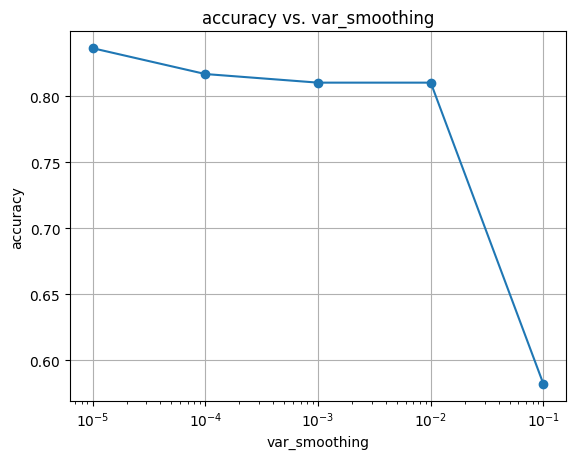

0.1 0.5816993464052288
0.01 0.8104575163398693
0.001 0.8104575163398693
0.0001 0.8169934640522876
1e-05 0.8366013071895425


In [19]:
# code #####

var_smoothings = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
accs = []

for var_smoothing in var_smoothings:
    model_GNB = naive_bayes.GaussianNB(var_smoothing=var_smoothing)
    model_GNB.fit(X_train_tfidf.toarray(), y_train_tfidf)

    # Hoàn thiện thêm phần code ở đây để ghi nhận acc tương ứng trong từng trường hợp
    y_pred_tfidf = model_GNB.predict(X_test_tfidf.toarray())
    acc = accuracy_score(y_test_tfidf, y_pred_tfidf)
    accs.append(acc)

# Minh họa tương quan bằng đồ thị
# Gợi ý: barplot, lineplot, logarithmic plot

plt.plot(var_smoothings, accs, marker="o", linestyle="-")
plt.xscale("log")  # Set the x-axis to be logarithmic
plt.xlabel("var_smoothing")
plt.ylabel("accuracy")
plt.title("accuracy vs. var_smoothing")
plt.grid(True)
plt.show()

""
############

for i in range(len(accs)):
    print(var_smoothings[i], accs[i])